In [1]:
# Standard Python modules
import os, sys
import glob
import numpy as np
import pandas as pd
import xarray as xr

# plot styles/formatting
import seaborn as sns
import cmocean.cm as cmo
import cmocean

# matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
from matplotlib.colorbar import Colorbar # different way to handle colorbar
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.projections import get_projection_class

sys.path.append('../modules')
from timeseries import select_months
import globalvars

In [2]:
path_to_data = globalvars.path_to_data
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [4]:
## create a list of dates - every day from Jan 1, 2000
dates = pd.date_range(start='2000-01-01', end='2019-12-31')

df_lst = []

## now we want to open each csv file, keeping only F24 of each day
for i, date in enumerate(dates):
    fdate = date.strftime("%Y%m%d")
    fname = path_to_data+'mclimate_csv/mclimate_init{0}.csv'.format(fdate)
    try: 
        test = pd.read_csv(fname)
        test["valid_time"] = date + pd.to_timedelta((test.index + 1) * 6, unit="h")
        test = test.set_index(pd.to_datetime(test['valid_time']))
        idx = (test['Unnamed: 0'] == "06 UTC | F006") | (test['Unnamed: 0'] == "12 UTC | F012") | (test['Unnamed: 0'] == "18 UTC | F018") | (test['Unnamed: 0'] == "00 UTC | F024")
        test = test.loc[idx]
        test = test.drop(columns=['Unnamed: 0', 'IVT', 'Freezing Level', 'UV', 'ivtdir_diff', 'uvdir_diff', 'Duration', "AR_index", 'valid_time'])
        df_lst.append(test)
    except FileNotFoundError:
        print('Skipping {0}, data not available...'.format(fdate))

df = pd.concat(df_lst)
df

Skipping 20060330, data not available...


,QPF
valid_time,
2000-01-01 06:00:00,92.0
2000-01-01 12:00:00,92.0
2000-01-01 18:00:00,92.0
2000-01-02 00:00:00,90.0
2000-01-02 06:00:00,75.0
...,...
2019-12-31 00:00:00,96.0
2019-12-31 06:00:00,94.0
2019-12-31 12:00:00,75.0


<Axes: xlabel='valid_time', ylabel='QPF'>

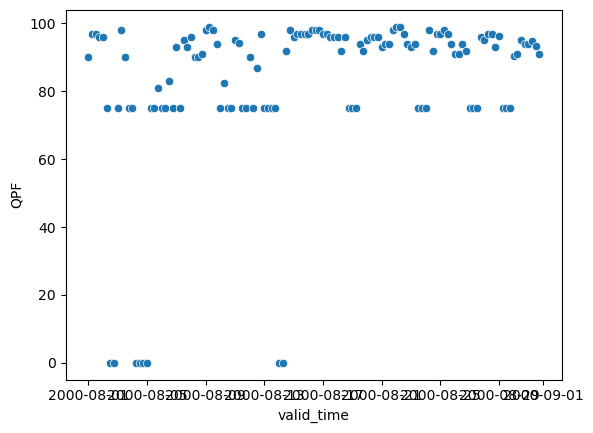

In [11]:
subset_df = df.loc[(df.index.year==2000) & (df.index.month==8)]
sns.scatterplot(data=subset_df, x=subset_df.index, y="QPF")

<Axes: xlabel='valid_time', ylabel='QPF'>

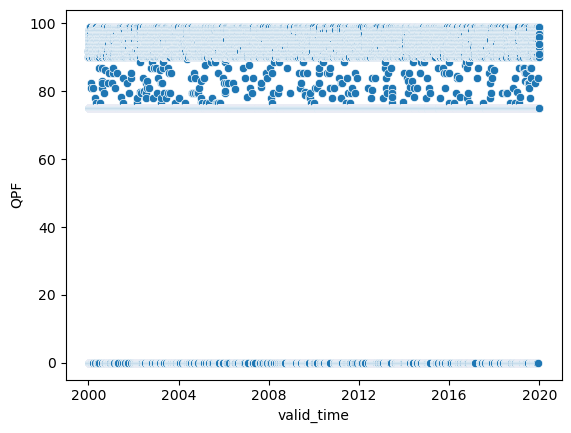

In [10]:
sns.scatterplot(data=df, x=df.index, y="QPF")
# Set the y-axis limits
# plt.ylim(75, 100) # Sets the y-axis from 5 to 25
